# The purpose of this notebook is to make the stackig for SIMQSO mocks and BOSS DR9 data.

The Dark Energy Spectroscopic Instrument (DESI) is a stage IV ground-based dark energy experiment. The instrument is planned to be installed in the 4-m Mayall telescope in Kitt Peak, in Arizona. The DESI instrument is composed of three principal features: 
* A focal plane assembly with 5000 fiber positioners that will be robotically-controlled.
* A new 6-lens wide-field corrector with a field of view (FoV) of 8 square degrees.
* Ten thermally-controlled 3-channel spectrographs over a wavelength from 360 to 980 nm, with a resolution $R=\dfrac{\lambda}{\Delta \lambda}$ between 2000 and 5500. The G-band from 360 to 555 nm, the R-band from 555 to 656 nm and Z-band from 656 to 980 nm.

DESI consist of two strategies that depends of the moonlight: the dark time and bright time. During the dark time, DESI will measure spectra of 4 tracers: 4 million Luminous Red Galaxies (LRG) between redshift 0.4 to 1.0, 17.1 million Emission Line Galaxies (ELG) between redshift 0.6 and 1.7, 1.7 million quasars with redshift from $0.9 < z < 2.1$ used as direct tracers and 0.7 million Ly-$\alpha$ quasars with redshift between $2.1 < z < 3.5$ for using the Lyman alpha Forest as a tracer of the matter along the line of sight of the quasar. DESI will use optical photometry combined with WISE infrared photometry in the W1 and W2 bands to select the primary sample of QSOs. The near-infrared allow us to discriminate between quasars and stars, as quasars are brighter at all redshifts compared to stars in the NIR.. During the bright time, 10 million galaxy spectra from 0.05 up to redshift 0.4 for generating a magnitude-limited Bright Galaxy Survey (BGS). 

In this work, we are interested in Ly-$\alpha$ quasars. We will select 260 QSOs per deg$^{2}$ over its footprint, of which 50 per deg$^{2}$ will be at z > 2.1 and suitable for the Ly-α forest.  There is a question, will we be able to efficiently identify the Lyman alpha quasars from the first pass, in time for the second pass? In order to answer question we need to do the following; simulate quasar target selection, simulate spectra for the targets, run quasar identifier and assess need for visual inspection. We will help with simulate spectra for the targets, in particular for Qasars. Once we know what type of objects we will target, we need to be able to simulate them. We are able to simulate quasars using two different templates, either SIMQSO or QSO. For the high-z quasars, we can add Lyman alpha absorption and astrophysical systematics using quickquasars (absorption from simulation files). However, it is not clear how representative are the simulated quasars, and how they compare to BOSS / eBOSS data. 

### Import modules

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
from glob import glob
import fitsio
from collections import defaultdict
from desitarget.targetmask import desi_mask
import desispec.io
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


The first step is to choose the parameters for quickquasars.

In [2]:
exptime=1e8   #Exposure time
ifile=specfile='/project/projectdirs/desi/mocks/lya_forest/london/v3.0/0/8/transmission-16-8.fits' #Choose one pixel to simulate the quasars. 
outdir='/global/homes/r/rodcn25/mean_simqso/stacking/'  #Where do you want to save the files, although in this particular notebook we will be overwritring the files. 
zmin=1.8
nmax=100   #máximum number of spectra to simulate in a pixel .
seed=568  #Seed to ensure reproducibility.

The next line is to run quickquasars. Note that, we have produced the specra with a high exposure time and with no transmission (no forest information) for get the continuum of the spectra. We have put the input and output of the cell that you will have to run. The output show a information about template, seeing, exptime, airmass, moonfrac, moonalt, moonsep, number of spectra and so on. I don't run this line because I already have the spectra in a directory. 

```python
specfile=outdir+'simqso/spectra.fits'  
cmd ='quickquasars --exptime {exptime} -i {ifile} -o {outfile} --zmin {zmin} --zbest --mags --desi-footprint \
--overwrite --nmax {nmax} --no-transmission --seed {seed}'.format(exptime=exptime,
ifile=ifile,outfile=specfile,zmin=zmin,nmax=nmax,seed=seed)  
!time $cmd
specobj= desispec.io.read_spectra(specfile)
```

```
INFO:quickquasars.py:635:main: Load SIMQSO model 
INFO:quickquasars.py:641:main: Load DeCAM and WISE filters for target selection sim.
ifilename /project/projectdirs/desi/mocks/lya_forest/london/v3.0/0/8/transmission-16-8.fits
INFO:quickquasars.py:136:get_healpix_info: healpix=HPXPIXEL=8
INFO:quickquasars.py:141:get_healpix_info: nside=HPXNSIDE=16
INFO:quickquasars.py:149:get_healpix_info: hpxnest from HPXNEST = True
found 8 16 True
INFO:quickquasars.py:230:simulate_one_healpix: Read skewers in /project/projectdirs/desi/mocks/lya_fores
/london/v3.0/0/8/transmission-16-8.fits, random seed = 1107510
INFO:quickquasars.py:234:simulate_one_healpix: Read transmission file /project/projectdirs/desi/mocks
/lya_forest/london/v3.0/0/8/transmission-16-8.fits
INFO:quickquasars.py:243:simulate_one_healpix: Select QSOs in DESI footprint 2197 -> 2197
INFO:quickquasars.py:265:simulate_one_healpix: Limit number of QSOs from 2197 to nmax=100 (random sub
sample)
INFO:quickquasars.py:350:simulate_one_healpix: Increase wavelength range from 3550:6499 to 3329:6499
to compute magnitudes
INFO:quickquasars.py:360:simulate_one_healpix: Increase wavelength range from 3329:6499 to 3329:55501
to compute magnitudes
INFO:quickquasars.py:381:simulate_one_healpix: Simulate 100 QSOs with SIMQSO templates
INFO:quickquasars.py:397:simulate_one_healpix: Resample to transmission wavelength grid
INFO:quickquasars.py:429:simulate_one_healpix: Apply transmitted flux fraction
INFO:quickquasars.py:459:simulate_one_healpix: Compute QSO magnitudes
INFO:quickquasars.py:493:simulate_one_healpix: Resample to a linear wavelength grid (needed by DESI sim.)
INFO:quickquasars.py:500:simulate_one_healpix: Simulate DESI observation and write output file
INFO:quickspectra.py:61:sim_spectra: Starting simulation of 100 spectra
DEBUG:simexp.py:416:simulate_spectra: loading specsim desi config desi
DEBUG:simexp.py:420:simulate_spectra: creating specsim desi simulator
INFO:simexp.py:442:simulate_spectra: MJD not in obsconditions, using DATE-OBS 2009-06-18T12:00:00.000
DEBUG:simexp.py:446:simulate_spectra: obsconditions SEEING = 1.1
DEBUG:simexp.py:446:simulate_spectra: obsconditions EXPTIME = 100000000.0
DEBUG:simexp.py:446:simulate_spectra: obsconditions AIRMASS = 1.0
DEBUG:simexp.py:446:simulate_spectra: obsconditions MOONFRAC = 0.0
DEBUG:simexp.py:446:simulate_spectra: obsconditions MOONALT = -60
DEBUG:simexp.py:446:simulate_spectra: obsconditions MOONSEP = 180
DEBUG:simexp.py:683:get_source_types: qso 100 targets
DEBUG:simexp.py:486:simulate_spectra: running simulation with fastsim fiber loss method
DEBUG:simexp.py:492:simulate_spectra: source types: 100 qso
INFO:quickspectra.py:230:sim_spectra: Wrote /global/homes/r/rodcn25/mean_simqso/stacking/simqso/spectra.fits
INFO:quickquasars.py:530:simulate_one_healpix: Added FOG to redshift with sigma 150 to zbest
INFO:quickquasars.py:533:simulate_one_healpix: Writing a truth file  /global/homes/r/rodcn25/mean_simqso
/stacking/simqso/truth-16-8.fits
WARNING: UnitsWarning: 'nanomaggies' did not parse as fits unit: At col 0, Unit 'nanomaggies' not supported 
by the FITS standard.  [astropy.units.core]
INFO:quickquasars.py:556:simulate_one_healpix: Read fibermap
INFO:quickquasars.py:558:simulate_one_healpix: Writing a zbest file /global/homes/r/rodcn25/mean_simqso
/stacking/simqso/zbest-16-8.fits

real	0m19.724s
user	0m17.317s
sys	0m1.732s
```

### Directory structure 

Spectra from individual exposures are in the exposures directory. But since DESI will take multiple exposures of overlapping tiles, the data from any given target or patch of sky could be spread across multiple files in multiple directories. To simplify this, the calibrated spectra are repackaged into a spectra-64 directory, where all spectra for a given healpix on the sky are grouped together. See an appendix to next [tutorial](https://github.com/desihub/tutorials/blob/master/Intro_to_DESI_spectra.ipynb) for a quick overview of healpix. 

The directory structure is:

DESI_SPECTRO_REDUX/SPECPROD/spectra-{nside}/{group}/{pix}/*-{nside}-{pix}.fits

where
* nside is the healpix nside hierarchy level with a default is nside=64 corresponding to pixels of 0.84 $deg^2$ with a few thousand targets each.
* group = nside//100 to avoid having thousands of directories at the same level 
* pix is the healpixel number using the nested scheme.

For example for nside=64 and pixel=16879:

- DESI_SPECTRO_REDUX/SPECTRO/spectra-64/168/16879/spectra-64-16879.fits
- DESI_SPECTRO_REDUX/SPECTRO/spectra-64/168/16879/zbest-64-16879.fits

where the first file contains the spectra and the second file contains information on the best-fit redshifts from the [redrock](https://github.com/desihub/redrock) code. Currently a new file is produced its name is truth-{nside}-{pix}.fits but I don't know what information it contains.

Let's get the spectra.

In [3]:
specfile = '/global/homes/r/rodcn25/mean_simqso/stacking/simqso/spectra.fits'
specobj= desispec.io.read_spectra(specfile)

Now let's see what the spectra look like. 

Text(0,0.5,'Flux')

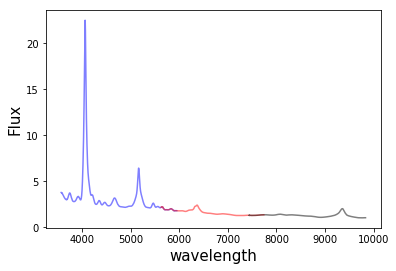

In [4]:
DM = fitsio.FITS(specfile) # open and read the .fits file.
spectrum = 0  # choose the spectra 0. 
plt.plot(specobj.wave["b"],specobj.flux["b"][spectrum],color='b', alpha=0.5)
plt.plot(specobj.wave["r"],specobj.flux["r"][spectrum],color='r', alpha=0.5)
plt.plot(specobj.wave["z"],specobj.flux["z"][spectrum],color='k', alpha=0.5)
plt.xlabel('wavelength',fontsize = 15)
plt.ylabel('Flux',fontsize = 15)

$\textbf{Reading the file Redshift}$

In [5]:
zfilename = specfile.replace('spectra.fits', 'zbest-16-8.fits')
zs = fitsio.read(zfilename)

When the number of spectra is large you should note that due to repeated observations, there could be a different number of targets than final redshifts.

In [6]:
print(zs.shape[0], 'redshifts')
print(specobj.num_targets(), 'targets')
print(specobj.num_spectra(), 'spectra')
print(specobj.flux['b'].shape, 'shape of flux["b"]')

100 redshifts
100 targets
100 spectra
(100, 2380) shape of flux["b"]


But for this example of 100 spectra they match...

The TARGETID allowing sources to be uniquely mapped from targeting, to spectra, to redshift. Let's extract all sources that were targeted as quasars using the fibermap information from the spectral file:

In [7]:
fm = fitsio.read(specfile,'FIBERMAP') #It have the information of the FIBERMAP.
#fm.dtype.descr # see the information about FIBERMAP in the cell.
qsos = np.where(specobj.fibermap["DESI_TARGET"] & desi_mask["QSO"])[0]
dd = defaultdict(list)
for index, item in enumerate(zs["TARGETID"]):
    dd[item].append(index)
zqsos = [index for item in fm[qsos]["TARGETID"] for index in dd[item] if item in dd]

This last line doesn't always work, because all I did was match the indices in zs to those for quasars in fm (the ordering of quasars in the fibermap file), on the unique TARGETID, such that the indices stored in qsos for fm point to the corresponding indices in zqsos for zs. This might help illustrate the result:

In [8]:
zs[zqsos]["TARGETID"][0:7], fm[qsos]["TARGETID"][0:7]

(array([80384, 81865, 89978, 64306, 84463, 67647, 77193]),
 array([80384, 81865, 89978, 64306, 84463, 67647, 77193]))

But when the number of spectra is large, there are two, or maybe more, targets ID for the same redshift.

Now, let's coose the correct redshift for each QSO and put them in the rest-frame.

In [9]:
qsoid = np.where(zs[zqsos]["SPECTYPE"] == b'QSO')[0] # choose the quasars
wave = specobj.wave   # wavelength
flux = specobj.flux   # flux of all spectra  
brf = []
rrf = []
zrf = []
for i in range(len(qsoid)):
    spectype = zs[zqsos[qsoid[i]]]["SPECTYPE"].decode('utf-8')
    z = zs[zqsos[qsoid[i]]]["Z"]
    brf.append(wave['b']/(1+z))
    rrf.append(wave['r']/(1+z))
    zrf.append(wave['z']/(1+z))

In [10]:
b_r_f = np.vstack(brf)
r_r_f = np.vstack(rrf)
z_r_f = np.vstack(zrf)
print(b_r_f.shape, 'shape of flux["b"]')
print(r_r_f.shape, 'shape of flux["r"]')
print(z_r_f.shape, 'shape of flux["z"]')

(100, 2380) shape of flux["b"]
(100, 2116) shape of flux["r"]
(100, 2399) shape of flux["z"]


Flux["b"] is the flux in the G band.

Let's look the spectra in the rest-frame.

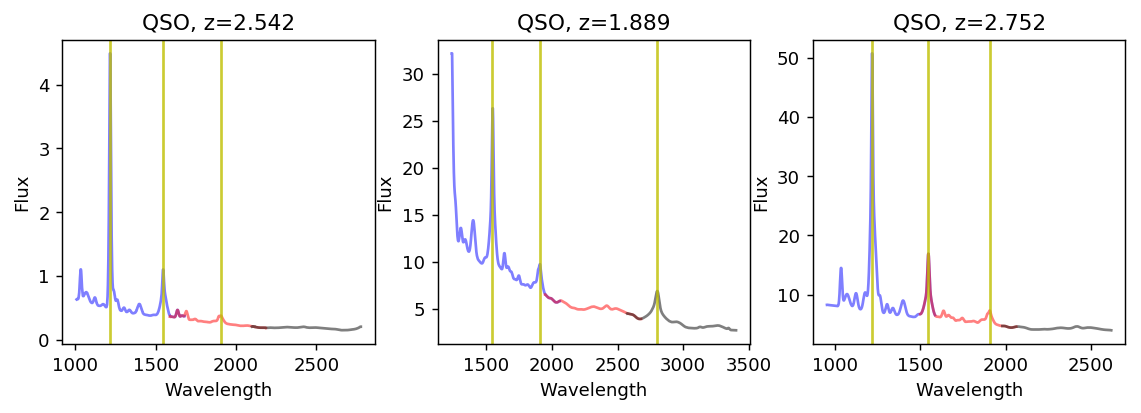

In [12]:
from scipy.signal import medfilt

qsolines = np.array([1216,1546,1906,2800,4853,4960,5008]) # Emission lines
plt.figure(figsize=(18,18),dpi=130)
for i in range(len(qsoid))[20:23]:
    plt.subplot(5,5,1+i)
    spectype = zs[zqsos[qsoid[i]]]["SPECTYPE"].decode('utf-8')
    z = zs[zqsos[qsoid[i]]]["Z"]
    
    plt.plot(b_r_f[i], medfilt(flux['b'][qsos[qsoid[i]]], 15), 'b', alpha=0.5)
    plt.plot(r_r_f[i], medfilt(flux['r'][qsos[qsoid[i]]], 15), 'r', alpha=0.5)
    plt.plot(z_r_f[i], medfilt(flux['z'][qsos[qsoid[i]]], 15), 'k', alpha=0.5)
    plt.xlabel('Wavelength')
    plt.ylabel('Flux')    
    plt.title("{}, z={:.3f}".format(spectype,z))
    for line in qsolines:
        if ((1+z)*line > np.min(wave['b'])) & ((1+z)*line < np.max(wave['z'])):
            axvline(line, color='y', alpha=0.8) 

The spectra were correctly placed in the rest-frame.

Let's look the all spectra in the rest-frame.

Text(0.5,1,'No normalized spectra QSO')

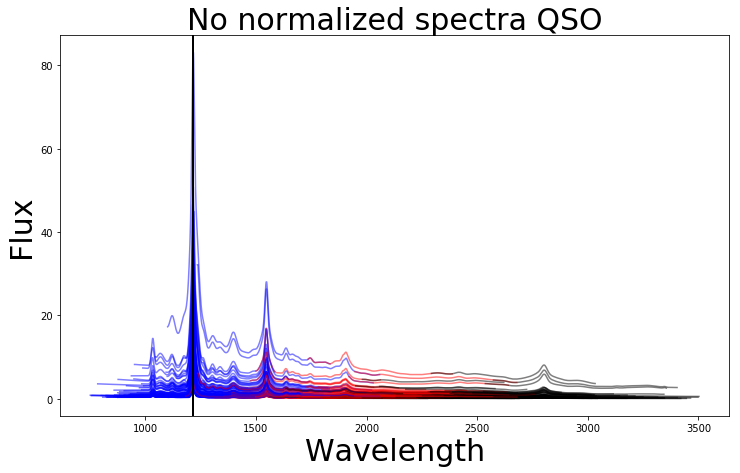

In [14]:
plt.figure(figsize=(12,7))
for i in range(len(qsoid)):
    spectype = zs[zqsos[qsoid[i]]]["SPECTYPE"].decode('utf-8')
#    z = zs[zqsos[qsoid[i]]]["Z"]
    plt.plot(b_r_f[i], medfilt(flux['b'][qsos[qsoid[i]]], 15), 'b', alpha=0.5)
    plt.plot(r_r_f[i], medfilt(flux['r'][qsos[qsoid[i]]], 15), 'r', alpha=0.5)
    plt.plot(z_r_f[i], medfilt(flux['z'][qsos[qsoid[i]]], 15), 'k', alpha=0.5)
    axvline(1216., color='k', alpha=1) 

plt.xlabel('Wavelength', fontsize = 30)
plt.ylabel('Flux', fontsize = 30)    
plt.title("No normalized spectra {}".format(spectype), fontsize = 30) 

Let's need to normalize the spectra to flux 1. For that, I will get the integral between the region of Ly-$\alpha$ y $CIV$, i. e. between 1280 and 1500 Angstroms. The people often normalize the spectra in 1280 Angstroms, but when the data are noisy the best is take a range. 
\begin{equation}
\int_{1280}^{1500}F(\lambda) d\lambda = 1.
\end{equation}

In [15]:
lmin=1280.0
lmax=1500.0
# Using Simpson 's method
integral = []
reject=0
flux_nor_g=[]
flux_nor_r=[]
flux_nor_z=[]
wave_nor_g=[]
wave_nor_r=[]
wave_nor_z=[]
for i in range(len(qsoid)):
    sum1=0
    sum2=0
    flag=0
    if b_r_f[i][0] > lmin : 
        flag=1
    elif b_r_f[i][2379] < lmax:
        #flag=1
        for s in range(len(b_r_f[0])):
            if lmin <= b_r_f[i][s] < r_r_f[i][0]:
                sum1+=(flux['b'][i][s])*(b_r_f[i][493]-b_r_f[i][492])
            if (b_r_f[i][s] > r_r_f[i][0]):
                break
                #continue
        for v in range(len(r_r_f[0])):
            if lmin <= r_r_f[i][v] < lmax:
                sum2+=(flux['r'][i][v])*(r_r_f[i][493]-r_r_f[i][492])
            if (r_r_f[i][v] > lmax):
                break
                #continue
    else:
        #flag=1
        for t in range(len(b_r_f[0])):
            if lmin <= b_r_f[i][t] < lmax:
                sum1+=(flux['b'][i][t])*(b_r_f[i][493]-b_r_f[i][492])
            if (b_r_f[i][t] > lmax):
                break
                #continue
         
    if (flag==0):
        integral.append(sum1 + sum2)  
        flux_nor_g.append(medfilt(flux['b'][qsos[qsoid[i]]]/(sum1+sum2)))
        flux_nor_r.append(medfilt(flux['r'][qsos[qsoid[i]]]/(sum1+sum2)))
        flux_nor_z.append(medfilt(flux['z'][qsos[qsoid[i]]]/(sum1+sum2)))
        wave_nor_g.append(b_r_f[i])
        wave_nor_r.append(r_r_f[i])
        wave_nor_z.append(z_r_f[i])
    else:
        reject+=1

The spectra without Ly-$\alpha$ peak are removed. But for this example all spectra have a Ly-$\alpha$ peak.

In [16]:
flux_nor_gband = np.vstack(flux_nor_g)
flux_nor_rband = np.vstack(flux_nor_r)
flux_nor_zband = np.vstack(flux_nor_z)
wave_nor_gband = np.vstack(wave_nor_g)
wave_nor_rband = np.vstack(wave_nor_r)
wave_nor_zband = np.vstack(wave_nor_z)
print(flux_nor_gband.shape, 'shape of flux normalized["g"]')
print(flux_nor_rband.shape, 'shape of flux normalized["r"]')
print(flux_nor_zband.shape, 'shape of flux normalized["z"]')
print(wave_nor_gband.shape, 'shape of wave normalized["g"]')
print(wave_nor_rband.shape, 'shape of wave normalized["r"]')
print(wave_nor_zband.shape, 'shape of wave normalized["z"]')

(100, 2380) shape of flux normalized["g"]
(100, 2116) shape of flux normalized["r"]
(100, 2399) shape of flux normalized["z"]
(100, 2380) shape of wave normalized["g"]
(100, 2116) shape of wave normalized["r"]
(100, 2399) shape of wave normalized["z"]


Text(0.5,1,'Normalized spectra QSO')

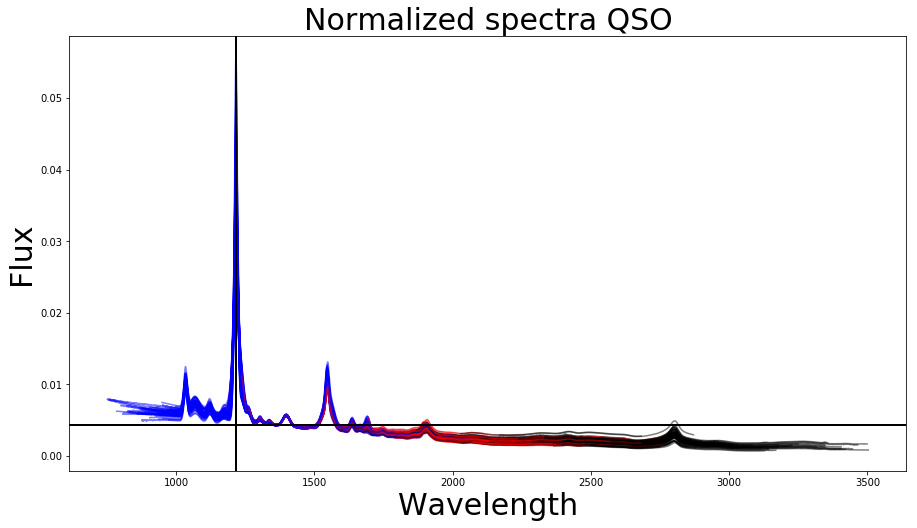

In [24]:
plt.figure(figsize=(15,8))
for i in range(len(integral)):
    spectype = zs[zqsos[qsoid[i]]]["SPECTYPE"].decode('utf-8')
    plt.plot(wave_nor_gband[i], flux_nor_gband[i], 'b', alpha=0.5)
    plt.plot(wave_nor_rband[i], flux_nor_rband[i], 'r', alpha=0.5)
    plt.plot(wave_nor_zband[i], flux_nor_zband[i], 'k', alpha=0.5)
    axvline(1216., color='k', alpha=1) 
    axhline(0.0043, color='k', alpha=1)

plt.xlabel('Wavelength', fontsize = 30)
plt.ylabel('Flux', fontsize = 30)    
plt.title("Normalized spectra {}".format(spectype), fontsize = 30)  

We can see that the flux of the spectra is approximately the same in the normalization zone.

In [20]:
print('The number of spectra accept = {}, The total integrals = {}'.format(len(qsoid)-reject,len(integral)))

The number of spectra accept = 100, The total integrals = 100


### Now, I have to do the redshift bins of 0.2 in size. 

Let's work only with the g-bang, but it's the same path for the other bands.

I first must delete the some redshifts that correspond to the sectra without ly-𝛼 peak. Then, make a redshift bins of size 0.2.

In [41]:
def bins_z(qq,qqq,zz,wavelength,zmin,zmax):
    reject_spectra = [] # ID of the rejected spectra.
    znew = [] # redshift of the accepted spectra 
    for j in range(len(qq)):
        z = zz[qqq[qq[j]]]["Z"]
        if wavelength[j][0] > 1280. :
            reject_spectra.append(zz[qqq]["TARGETID"][j])
            continue
        else:
            znew.append(z)
    bin1 = [] #ID of the accepted spectra inside the bin 
    wave_zbin_g = [] 
    flux_zbin_g = []
    for i in range(len(znew)):
        zn = znew[i]
        if zmin < zn < zmax:
            bin1.append(zs[qqq]["TARGETID"][i])
            wave_zbin_g.append(wave_nor_gband[i])
            flux_zbin_g.append(flux_nor_gband[i])
    wzbg = np.vstack(wave_zbin_g)
    fzbg = np.vstack(flux_zbin_g)
    return wzbg, fzbg

For the diferents bins.

In [42]:
wave1,flux1 = bins_z(qsoid,zqsos,zs,b_r_f,2.2,2.4)
wave2,flux2 = bins_z(qsoid,zqsos,zs,b_r_f,2.4,2.6)
wave3,flux3 = bins_z(qsoid,zqsos,zs,b_r_f,2.6,2.8)

Now, let's calculate the mean continuum making a wavelength bins of size 1 and taking the average of the flux for the differents spectra inside of each wavelength bin.

In [43]:
def stack(wzbg3,fzbg3):
    count3 = np.zeros(int(np.max(wzbg3))-int(np.min(wzbg3))+1)
    mean3= np.zeros(int(np.max(wzbg3))-int(np.min(wzbg3))+1)
    sumflux3 = np.zeros(int(np.max(wzbg3))-int(np.min(wzbg3))+1)
    vari3 = np.zeros(int(np.max(wzbg3))-int(np.min(wzbg3))+1)
    varian3 = np.zeros(int(np.max(wzbg3))-int(np.min(wzbg3))+1)
    for i in range(len(wzbg3)):
        for j in range(len(wzbg3[0])):
            co = int(wzbg3[i][j])-int(np.min(wzbg3))
            count3[co]+=1
            sumflux3[co]+=fzbg3[i][j]
            mean3 = np.array(sumflux3/count3)
            vari3[co]+=(fzbg3[i][j]-mean3[co])**2
            varian3 = np.sqrt(vari3/count3)
    return mean3, varian3

The stack for the different redshift bins.

In [44]:
mean1, std1 = stack(wave1,flux1)
mean2, std2 = stack(wave2,flux2)
mean3, std3 = stack(wave3,flux3)

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in true_divide
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in true_divide


Let's need a new wavelength for each redshift bin.

In [45]:
wavebin1 = np.linspace(int(np.min(wave1)),int(np.max(wave1)),int(np.max(wave1))-int(np.min(wave1))+1)
wavebin2 = np.linspace(int(np.min(wave2)),int(np.max(wave2)),int(np.max(wave2))-int(np.min(wave2))+1)
wavebin3 = np.linspace(int(np.min(wave3)),int(np.max(wave3)),int(np.max(wave3))-int(np.min(wave3))+1)

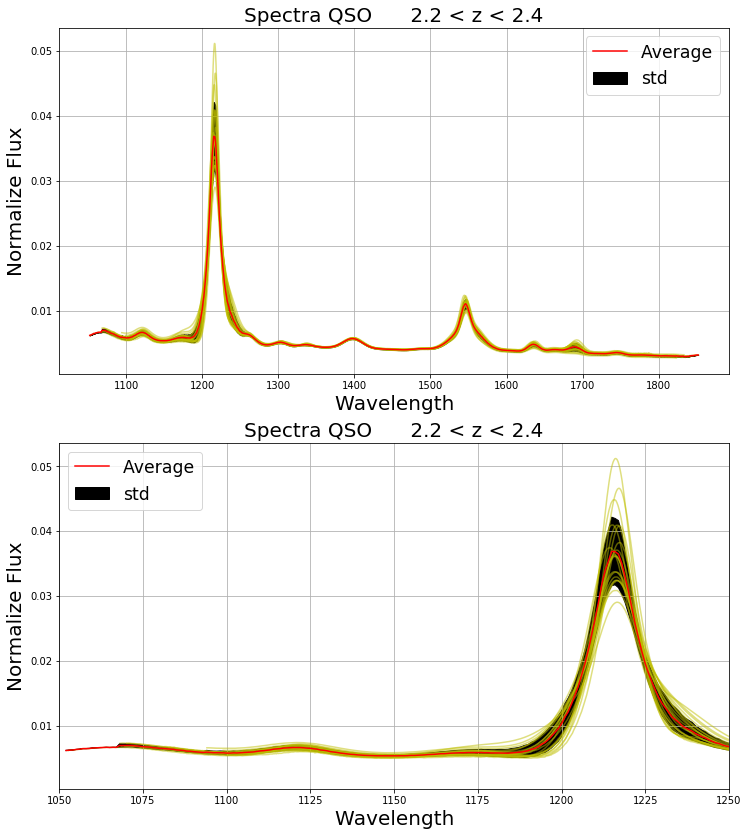

In [61]:
plt.figure(figsize=(12,14))
plt.subplot(2,1,1)
for m in range(len(wave1)):
    spectype = zs[zqsos[qsoid[i]]]["SPECTYPE"].decode('utf-8')
    plt.plot(wave1[m], flux1[m], 'y', alpha=0.5)

plt.plot(wavebin1,mean1,color='r',label='Average',alpha=1)
plt.fill_between(wavebin1,mean1+std1, mean1-std1, label='std', color = 'k', alpha=1)
plt.xlabel('Wavelength', fontsize = 20)
plt.ylabel('Normalize Flux', fontsize = 20)   
plt.title("Spectra {}      2.2 < z < 2.4".format(spectype), fontsize = 20)
plt.legend(fontsize='xx-large')
plt.grid()

plt.subplot(2,1,2)
for m in range(len(wave1)):
    spectype = zs[zqsos[qsoid[i]]]["SPECTYPE"].decode('utf-8')
    plt.plot(wave1[m], flux1[m], 'y', alpha=0.5)

plt.plot(wavebin1,mean1,color='r',label='Average',alpha=1)
plt.fill_between(wavebin1,mean1+std1, mean1-std1, label='std', color = 'k', alpha=1)
plt.xlabel('Wavelength', fontsize = 20)
plt.ylabel('Normalize Flux', fontsize = 20)   
plt.xlim(1050,1250)
plt.title("Spectra {}      2.2 < z < 2.4".format(spectype), fontsize = 20)
plt.legend(fontsize='xx-large')
plt.grid()

And for the all redshift bins, we have,

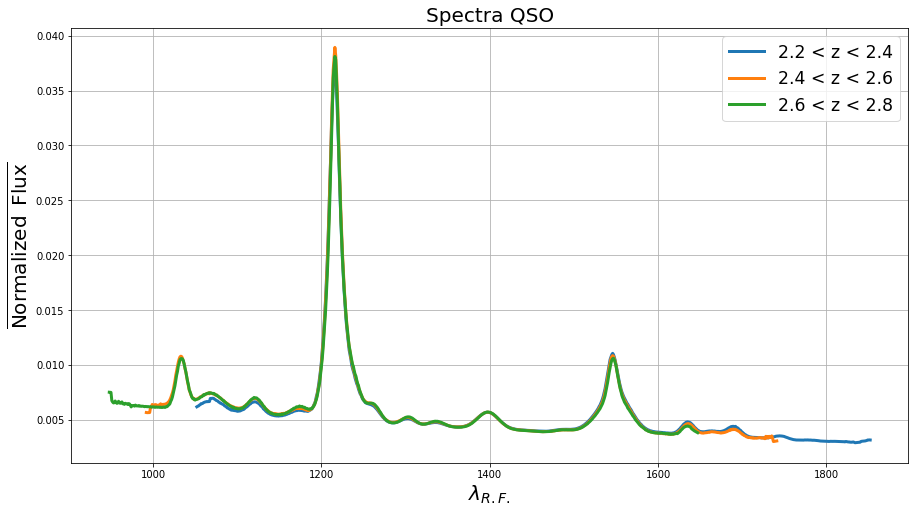

In [66]:
plt.figure(figsize=(15,8))
plt.plot(wavebin1,mean1,label='2.2 < z < 2.4',linewidth=3.0)
plt.plot(wavebin2,mean2,label='2.4 < z < 2.6', linewidth=3.0)
plt.plot(wavebin3,mean3,label='2.6 < z < 2.8',linewidth=3.0)
plt.xlabel('$\lambda_{R.F.}$', fontsize = 20)
plt.ylabel('$\mathrm{\overline{Normalized\enspace Flux}}$', fontsize = 20)    
plt.title("Spectra {}".format(spectype), fontsize = 20)
plt.legend(fontsize='xx-large')
plt.grid()